# G2M Insight for Cab Investment firm

Week 2 Assignment  
Prepared by: Soniya Sunny

<ins>The Client</ins>

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision. 

Multiple data sets have been provided that contain information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.  

Time period of data: 31/01/2016 to 31/12/2018   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <ins>Data Sets:</ins> 
* Cab_Data.csv – Details of transaction for 2 cab companies  
* Customer_ID.csv – Mapping table that contains a unique identifier which links the customer’s demographic details  
* Transaction_ID.csv – Mapping table that contains transaction to customer mapping and payment mode  
* City.csv – List of US cities, their population and number of cab users
* US_Holiday_Dates_(2004-2021).csv - List of US holiday dates

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
print(cab_data.describe())
cab_data.head(3)

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [3]:
city_data = pd.read_csv("City.csv")
print(city_data.describe())
city_data.head(3)

             City Population      Users
count          20         20         20
unique         20         20         20
top     DALLAS TX   959,307    144,132 
freq            1          1          1


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [4]:
customer_data = pd.read_csv("Customer_ID.csv")
print(customer_data.describe())
customer_data.head(3)

        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [5]:
transaction_data = pd.read_csv("Transaction_ID.csv")
print(transaction_data.describe())
transaction_data.head(3)

       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [6]:
us_holiday_data = pd.read_csv("US_Holiday_Dates_(2004-2021).csv")
print(us_holiday_data.describe())
us_holiday_data.head(3)

            Month         Day         Year
count  342.000000  342.000000   342.000000
mean     7.263158   15.853801  2012.500000
std      3.899889    9.653330     5.195729
min      1.000000    1.000000  2004.000000
25%      4.000000    6.000000  2008.000000
50%      9.000000   16.500000  2012.500000
75%     11.000000   24.000000  2017.000000
max     12.000000   31.000000  2021.000000


,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006


### Combining all datasets

In [7]:
# merging cab_data and transaction_data on "Transaction ID"
main_df = cab_data.merge(transaction_data, on= "Transaction ID")
main_df = main_df.merge(customer_data, on ="Customer ID").merge(city_data, on = "City")
main_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [8]:
# Converting "date_of_travel" column of main_df to datetime
main_df["Date of Travel"] = pd.to_datetime(main_df["Date of Travel"])
# Converting "Date" column of us_holiday_data to datetime
us_holiday_data["Date"] = pd.to_datetime(us_holiday_data["Date"])
# we need only "Date" and "holiday" columns
us_holiday_data = us_holiday_data[["Date", "Holiday"]]
# renaming column name
us_holiday_data = us_holiday_data.rename(columns={"Date":"Date of Travel"})


In [9]:
# merging holiday data
main_df = main_df.merge(us_holiday_data, on= "Date of Travel", how="left")
# filling missing data
main_df["Holiday"]=main_df["Holiday"].fillna("No")

In [10]:
for column in main_df.columns:
    main_df = main_df.rename(columns={column:column.lower().replace(' ','_')})
main_df = main_df.rename(columns={'income_(usd/month)': 'income', 'profit/km': 'profit_km'})

### Check for null values

In [11]:
main_df.isna().sum()

transaction_id    0
date_of_travel    0
company           0
city              0
km_travelled      0
price_charged     0
cost_of_trip      0
customer_id       0
payment_mode      0
gender            0
age               0
income            0
population        0
users             0
holiday           0
dtype: int64

* We do not have any null values in the combined dataframe.

### Analyzing Datatypes

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359854 entries, 0 to 359853
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  359854 non-null  int64         
 1   date_of_travel  359854 non-null  datetime64[ns]
 2   company         359854 non-null  object        
 3   city            359854 non-null  object        
 4   km_travelled    359854 non-null  float64       
 5   price_charged   359854 non-null  float64       
 6   cost_of_trip    359854 non-null  float64       
 7   customer_id     359854 non-null  int64         
 8   payment_mode    359854 non-null  object        
 9   gender          359854 non-null  object        
 10  age             359854 non-null  int64         
 11  income          359854 non-null  int64         
 12  population      359854 non-null  object        
 13  users           359854 non-null  object        
 14  holiday         359854 non-null  obj

In [13]:
# Replacing symbols in Population and Users columns
main_df["population"] = main_df["population"].str.strip().str.replace(",","")
main_df["users"] = main_df["users"].str.strip().str.replace(",","")

# Converting some columns to category type
for column in ["company", "city" , "payment_mode" , "gender" , "holiday"] :
    main_df[column] = main_df[column].astype("category")

# Converting some columns to integer type
for column in ["population", "users"] :
    main_df[column] = main_df[column].astype("int64")

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359854 entries, 0 to 359853
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  359854 non-null  int64         
 1   date_of_travel  359854 non-null  datetime64[ns]
 2   company         359854 non-null  category      
 3   city            359854 non-null  category      
 4   km_travelled    359854 non-null  float64       
 5   price_charged   359854 non-null  float64       
 6   cost_of_trip    359854 non-null  float64       
 7   customer_id     359854 non-null  int64         
 8   payment_mode    359854 non-null  category      
 9   gender          359854 non-null  category      
 10  age             359854 non-null  int64         
 11  income          359854 non-null  int64         
 12  population      359854 non-null  int64         
 13  users           359854 non-null  int64         
 14  holiday         359854 non-null  cat

In [14]:
main_df.describe(include="all", datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_id,359854.0,NaN,NaN,NaN,10220689.89583,10000011.0,10110925.25,10220804.5,10330821.75,10440107.0,126739.982588
date_of_travel,359854,NaN,NaN,NaN,2017-08-16 21:50:23.726288640,2016-01-02 00:00:00,2016-11-24 00:00:00,2017-09-09 00:00:00,2018-05-11 00:00:00,2018-12-31 00:00:00,NaN
company,359854,2,Yellow Cab,275069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,359854,19,NEW YORK NY,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km_travelled,359854.0,NaN,NaN,NaN,22.567304,1.9,12.0,22.44,32.96,48.0,12.232944
price_charged,359854.0,NaN,NaN,NaN,423.517722,15.6,206.5,386.425,583.74,2048.03,274.455816
cost_of_trip,359854.0,NaN,NaN,NaN,286.196987,19.0,151.2,282.48,413.6832,691.2,157.989831
customer_id,359854.0,NaN,NaN,NaN,19194.701346,1.0,2705.0,7459.0,36087.75,60000.0,21014.265474
payment_mode,359854,2,Card,215777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,359854,2,Male,206170,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# deriving more features from given data
main_df["profit"] = main_df["price_charged"] - main_df["cost_of_trip"] 
main_df['profit_percentage'] = (main_df["profit"]/main_df["cost_of_trip"])*100
main_df["profit_km"] = main_df["profit"]/ main_df["km_travelled"]
main_df["day_name"] = main_df["date_of_travel"].dt.day_name()
main_df["month"] = main_df["date_of_travel"].dt.month_name()
main_df["year"] = main_df["date_of_travel"].dt.year

main_df.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,...,income,population,users,holiday,profit,profit_percentage,profit_km,day_name,month,year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885,24701,No,57.3150,18.274427,1.882266,Friday,January,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885,24701,No,281.2772,88.612790,10.739870,Saturday,July,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885,24701,No,194.6480,32.582415,4.574571,Friday,November,2018
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885,24701,No,23.6660,7.067558,0.826904,Wednesday,January,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885,24701,No,253.9808,54.371732,6.981330,Saturday,April,2018


### Dividing into Pink & Yellow

In [16]:
main_df["company"].value_counts()

Yellow Cab    275069
Pink Cab       84785
Name: company, dtype: int64

In [17]:
pink_data = main_df[main_df["company"] == "Pink Cab"]
yellow_data = main_df[main_df["company"] == "Yellow Cab"]
pink_data.describe()
#yellow_data.describe()

,transaction_id,km_travelled,price_charged,cost_of_trip,customer_id,age,income,population,users,profit,profit_percentage,profit_km,year
count,8.478500e+04,84785.000000,84785.000000,84785.000000,84785.000000,84785.000000,84785.000000,8.478500e+04,84785.000000,84785.000000,84785.000000,84785.000000,84785.000000
mean,1.022389e+07,22.558640,310.775134,248.136757,18426.011299,35.321696,15058.710220,2.350132e+06,125574.296302,62.638377,25.555378,2.769463,2017.049891
std,1.261354e+05,12.230707,181.984835,135.399263,18085.726109,12.644735,7991.075632,2.734528e+06,94585.933623,77.579517,24.954010,2.696942,0.799389
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,-40.933780,-4.912054,2016.000000
25%,1.011016e+07,12.000000,159.970000,131.868000,5320.000000,25.000000,8371.000000,8.148850e+05,27247.000000,11.196000,8.035200,0.891043,2016.000000
50%,1.022587e+07,22.440000,298.040000,246.330000,8876.000000,33.000000,14711.000000,1.595037e+06,144132.000000,41.494000,22.152479,2.423438,2017.000000
75%,1.033640e+07,32.960000,441.460000,360.180000,27199.000000,42.000000,21055.000000,1.955130e+06,164468.000000,93.944000,39.450471,4.281308,2018.000000
max,1.043762e+07,48.000000,1623.480000,576.000000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1119.480000,275.451334,28.646939,2018.000000


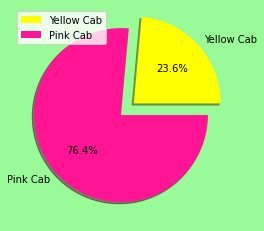

In [18]:
company = main_df.groupby(['company']).transaction_id.count()
plt.figure(facecolor='palegreen')
plt.pie(company, labels=["Yellow Cab", "Pink Cab"], explode=[0.2,0], colors=["yellow", "deeppink"], autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

## <ins> Hypotheses:</ins>
1. Seasonality:  
Is there any seasonality in the cab services: daily, monthly and yearly analysis?
2. Influence of Geography / cities
3. Profit Analysis
4. Holiday Analysis
5. age, gender, income analysis

## <ins> Data Analysis:</ins>

1. Seasonality

Day-by-day analysis:

In [19]:
day_df = main_df.groupby(["date_of_travel"]).size().reset_index().rename(columns = {0 : 'count'})
print(day_df.sort_values(by="count", ascending=False).head(3))
print(day_df.sort_values(by="count", ascending=False).tail(3))

    date_of_travel  count
734     2018-01-05   2022
713     2017-12-15   1123
706     2017-12-08   1100
  date_of_travel  count
9     2016-01-11     85
3     2016-01-05     47
2     2016-01-04     25


In [20]:
day_df = main_df.groupby(["date_of_travel", "company"]).size().reset_index().rename(columns = {0 : 'count'})
print(day_df.sort_values(by="count", ascending=False).head(3))
print(day_df.sort_values(by="count", ascending=False).tail(3))

     date_of_travel     company  count
1469     2018-01-05  Yellow Cab   1494
1427     2017-12-15  Yellow Cab    852
1413     2017-12-08  Yellow Cab    841
   date_of_travel   company  count
18     2016-01-11  Pink Cab     13
6      2016-01-05  Pink Cab      6
4      2016-01-04  Pink Cab      4


When dividing the data on daily basis, we can see that most trips were occured on 2018-01-05 and least on 2016-01-04.  
If we divide the data based on companies, we get similar results.

Text(0.5, 1.0, 'Date of Travel Analysis')

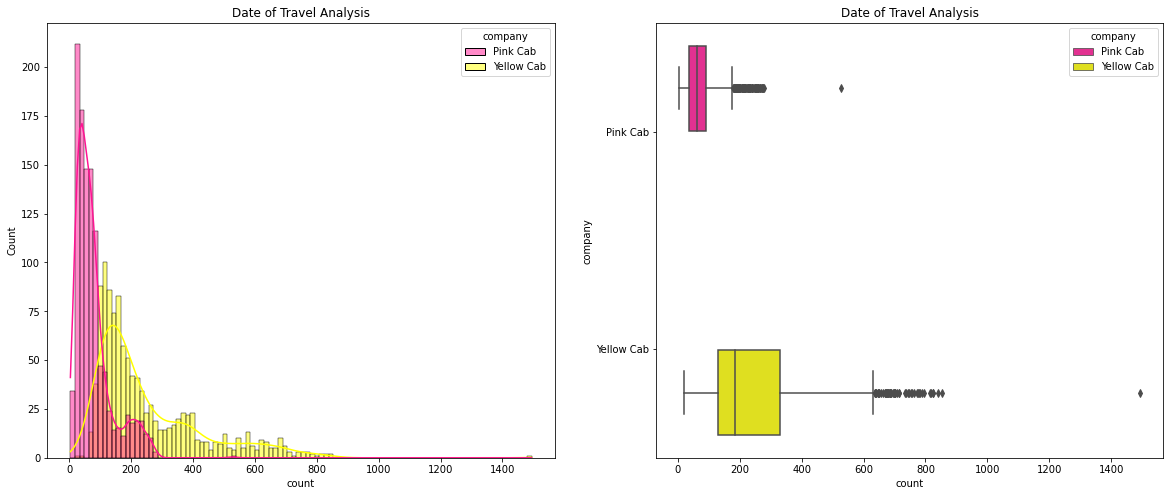

In [21]:
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.histplot(x = 'count', hue = "company", data = day_df, kde = True, palette = ['deeppink', 'yellow'],  
             bins = 100, ax = ax[0]).set_title("Date of Travel Analysis")

sns.boxplot(x = 'count', y = "company", data = day_df, hue = "company",  palette = ['deeppink', 'yellow'],
            ax = ax[1]).set_title("Date of Travel Analysis")

Histplot and boxplot shows that we cannot summarize a particular day with greater count of travels.

Text(0, 0.5, 'Count of trips')

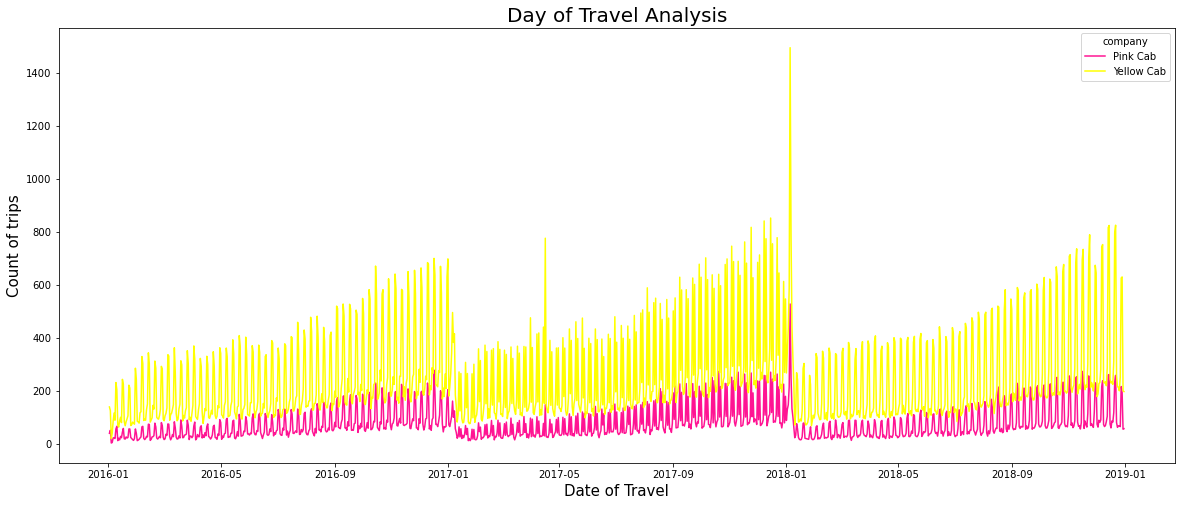

In [22]:
plt.figure(figsize = (20, 8))
sns.lineplot(x = "date_of_travel", y = 'count', data = day_df, hue = "company", 
             palette = ['deeppink', 'yellow'])
plt.title('Day of Travel Analysis', size=20)
plt.xlabel('Date of Travel', size=15)
plt.ylabel('Count of trips', size=15)

The overall time analysis of data shows the seasonality of trips.  
We can see a pattern for each year.  
The count of trips is increasing throughout the year, from January to December. The pattern repeats each year

Monthly Analysis:

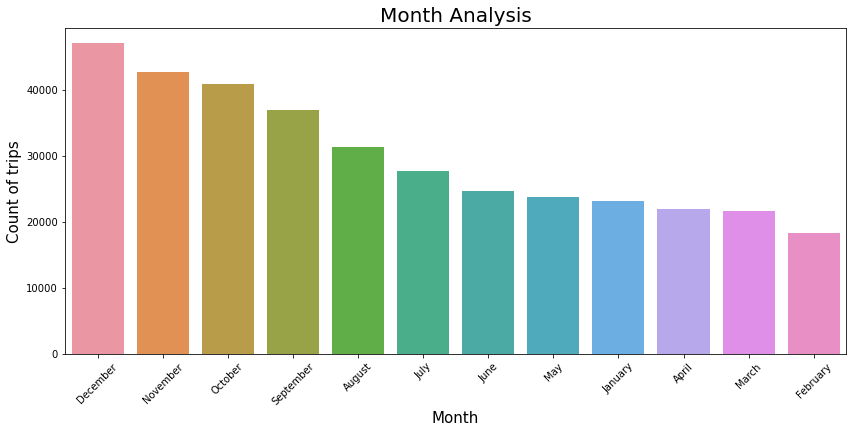

In [23]:
month = main_df.groupby(['month']).transaction_id.count().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=month.index,y=month.values)     
plt.title("Month Analysis", size=20)
plt.xticks(rotation=45)
plt.xlabel("Month", size=15)
plt.ylabel("Count of trips", size=15)
plt.show()

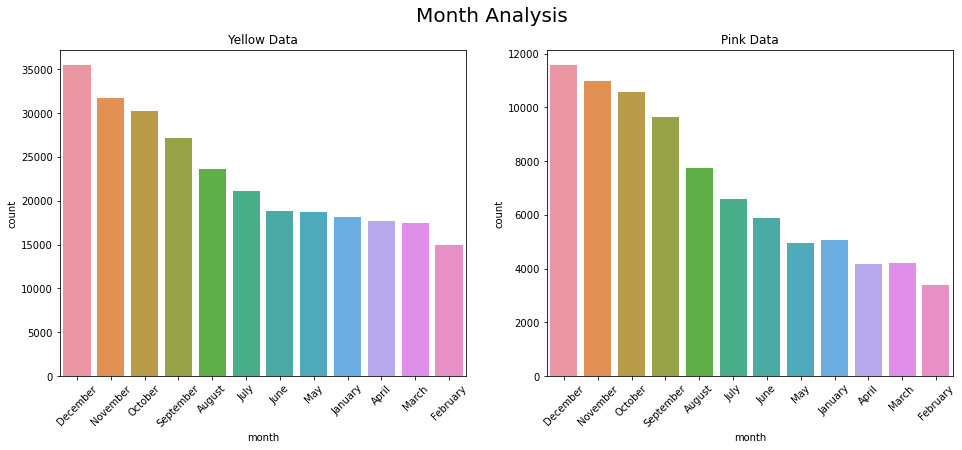

In [24]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

month_dfy = yellow_data.groupby(["month"]).size().reset_index().rename(columns = {0 : 'count'})
month_dfp = pink_data.groupby(["month"]).size().reset_index().rename(columns = {0 : 'count'})

sns.barplot(x='month', y='count', data=month_dfy, order=month_dfy.sort_values('count', ascending=False).month, ax=ax[0]).set_title("Yellow Data")
sns.barplot(x='month', y='count', data=month_dfp, order=month_dfy.sort_values('count', ascending=False).month, ax=ax[1]).set_title("Pink Data")
plt.suptitle("Month Analysis", size=20)
ax[0].tick_params(axis= 'x', labelrotation=45)
ax[1].tick_params(axis= 'x', labelrotation=45)
plt.show()

Yearly Analysis:

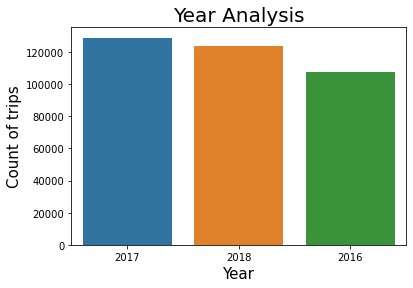

In [25]:
year_df = main_df.groupby(["year"]).size().reset_index().rename(columns = {0 : 'count'})
sns.barplot(x='year', y='count', data=year_df, order=year_df.sort_values('count', ascending=False).year)
plt.title("Year Analysis", size=20)
plt.xlabel("Year", size=15)
plt.ylabel("Count of trips", size=15)
plt.show()

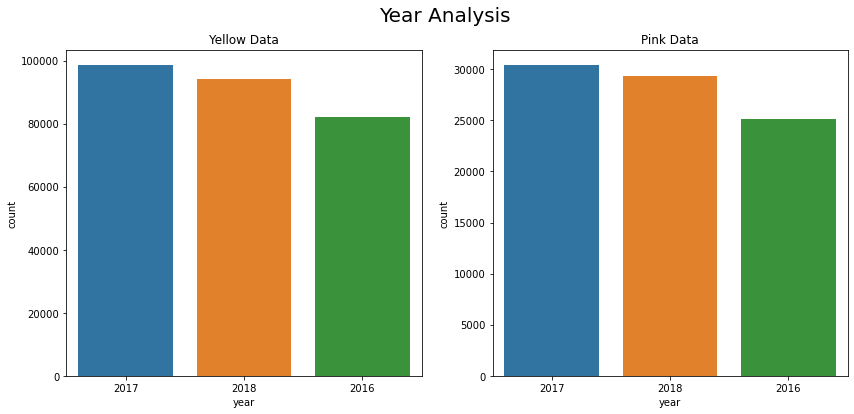

In [26]:
fig, ax = plt.subplots(1,2, figsize = (14,6))

year_dfy = yellow_data.groupby(["year"]).size().reset_index().rename(columns = {0 : 'count'})
year_dfp = pink_data.groupby(["year"]).size().reset_index().rename(columns = {0 : 'count'})

sns.barplot(x='year', y='count', data=year_dfy, order=year_df.sort_values('count', ascending=False).year, ax=ax[0]).set_title("Yellow Data")
sns.barplot(x='year', y='count', data=year_dfp, order=year_df.sort_values('count', ascending=False).year, ax=ax[1]).set_title("Pink Data")
plt.suptitle("Year Analysis", size=20)
plt.show()

In the daily, monthly and yearly analyses, we can see similar patterns for both cabs, but yellow cabs have more counts than pink cabs.

2. Profit Analysis by cities

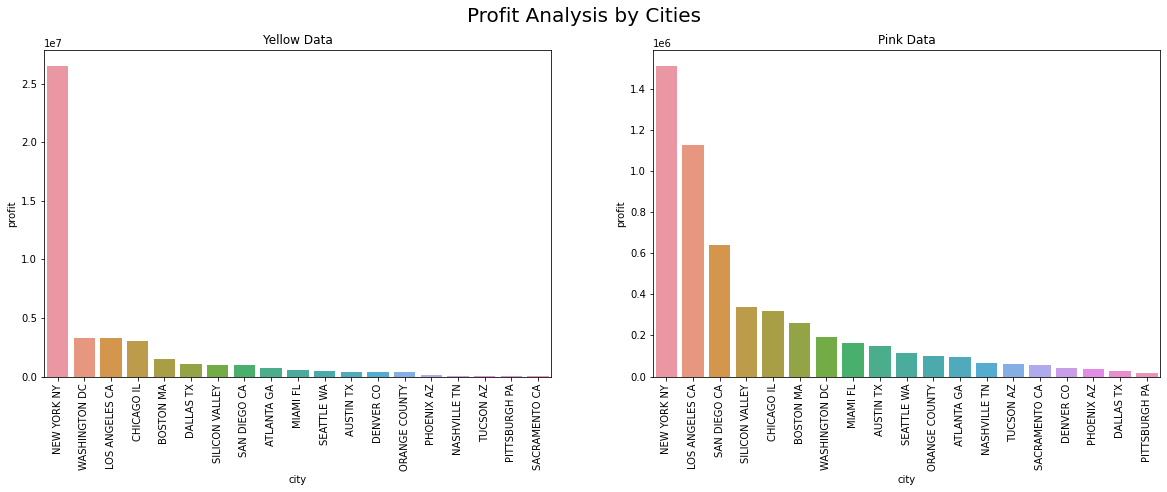

In [27]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
profit_yellow= pd.DataFrame(yellow_data.groupby('city').profit.sum().reset_index())
profit_pink= pd.DataFrame(pink_data.groupby('city').profit.sum().reset_index())
sns.barplot(x='city', y='profit', data=profit_yellow, ax=ax[0], order=profit_yellow.sort_values('profit', ascending=False).city).set_title("Yellow Data")
sns.barplot(x='city', y='profit', data=profit_pink, ax=ax[1], order=profit_pink.sort_values('profit', ascending=False).city).set_title("Pink Data")

plt.suptitle("Profit Analysis by Cities", size=20)
ax[0].tick_params(axis= 'x', labelrotation=90)
ax[1].tick_params(axis= 'x', labelrotation=90)
plt.show()



For both cabs, New York city has the highest profit.

3. Profit/km Analysis by Year

Text(0.5, 1.0, 'profit_km Analysis by Year')

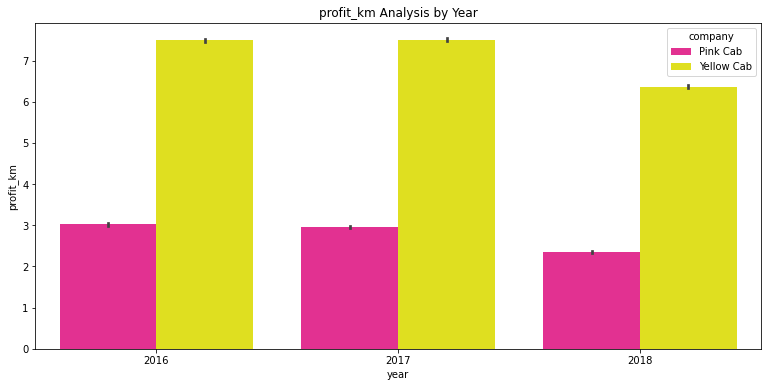

In [28]:
plt.figure(figsize = (13,6))
sns.barplot(x = "year", y = 'profit_km', data = main_df, hue = "company", 
             palette = ['deeppink', 'yellow'])
plt.title("profit_km Analysis by Year")

4. Holiday Analysis

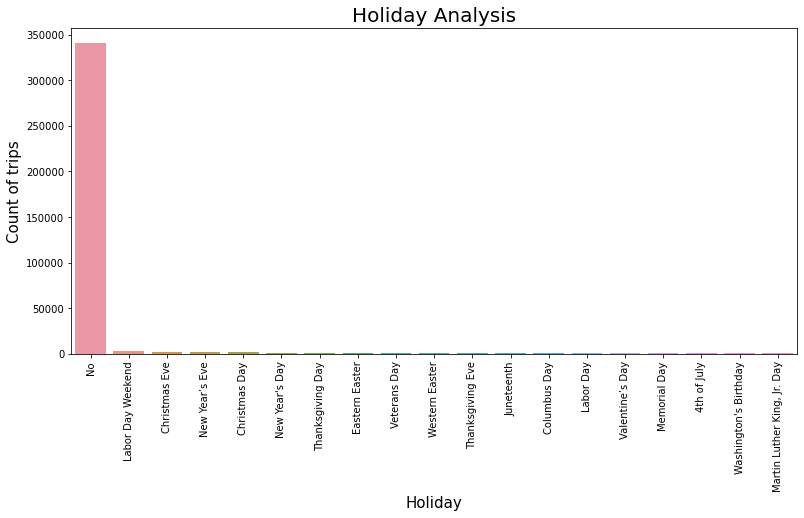

In [29]:
holiday_df = main_df.groupby(["holiday"]).size().reset_index().rename(columns = {0 : 'count'})
plt.figure(figsize = (13,6))
sns.barplot(x='holiday', y='count', data=holiday_df, order=holiday_df.sort_values('count', ascending=False).holiday)
plt.title("Holiday Analysis", size=20)
plt.xlabel("Holiday", size=15)
plt.ylabel("Count of trips", size=15)
plt.xticks(rotation=90)
plt.show()

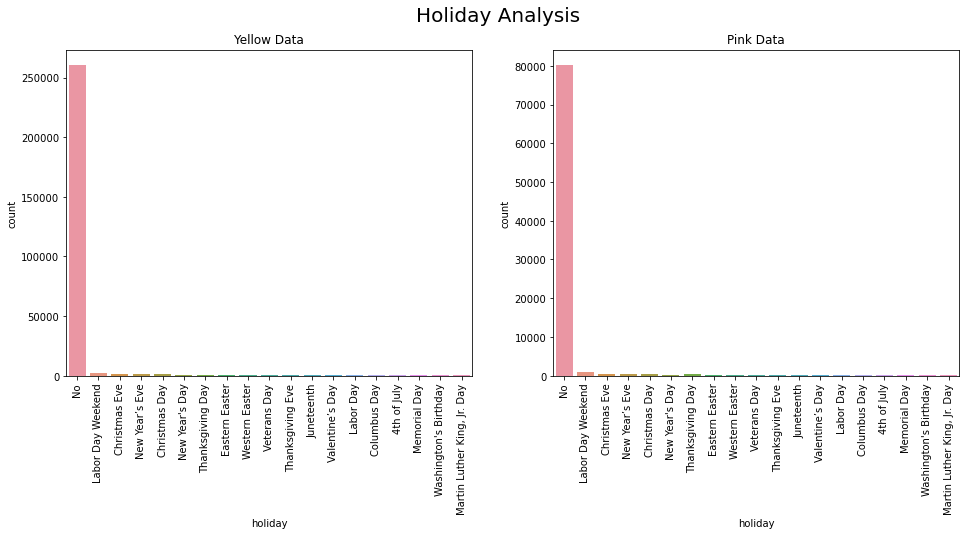

In [30]:
fig, ax = plt.subplots(1,2, figsize = (16,6))

holiday_dfy = yellow_data.groupby(["holiday"]).size().reset_index().rename(columns = {0 : 'count'})
holiday_dfp = pink_data.groupby(["holiday"]).size().reset_index().rename(columns = {0 : 'count'})

sns.barplot(x='holiday', y='count', data=holiday_dfy, order=holiday_dfy.sort_values('count', ascending=False).holiday, ax=ax[0]).set_title("Yellow Data")
sns.barplot(x='holiday', y='count', data=holiday_dfp, order=holiday_dfy.sort_values('count', ascending=False).holiday, ax=ax[1]).set_title("Pink Data")
plt.suptitle("Holiday Analysis", size=20)
ax[0].tick_params(axis= 'x', labelrotation=90)
ax[1].tick_params(axis= 'x', labelrotation=90)
plt.show()

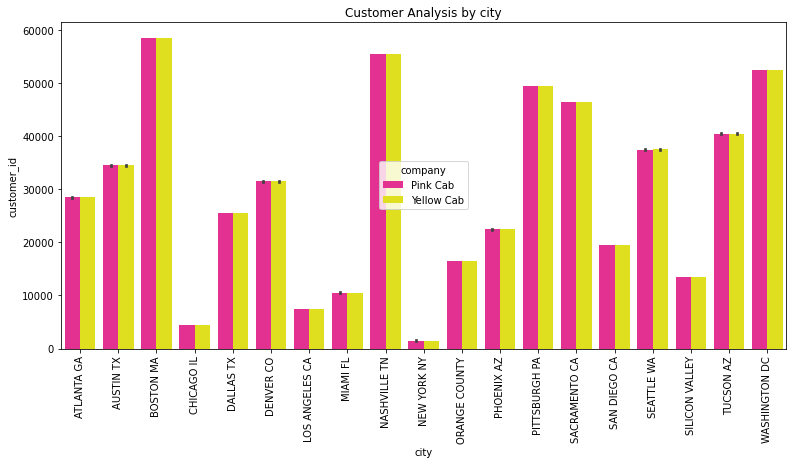

In [31]:
plt.figure(figsize = (13,6))
sns.barplot(x = "city", y = 'customer_id', data = main_df, hue= 'company',
             palette = ['deeppink', 'yellow'])
plt.title("Customer Analysis by city")
plt.xticks(rotation=90)
plt.show()

### Recommendations

* Yellow cab is better for investment
- Profit : Yellow cabs have more profit, profit/km
- For both cabs, New York city has the highest profit.
- In the daily, monthly and yearly analyses, we can see similar patterns for both cabs, but yellow cabs have more counts than pink cabs.